In [1]:
import pandas as pd
import json
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
import xgboost
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn import metrics

import matplotlib.pyplot as plt

import re
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
ds = pd.read_csv("house_dataset.csv")
ds.head()

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ..."
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ..."
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',..."


In [4]:
ds.describe()

,FLOOR,BEDROOM,BATHROOM
count,3323.000000,3136.000000,3072.000000
mean,2.668492,5.399235,4.187826
std,0.726047,3.148436,2.674617
min,1.000000,1.000000,1.000000
25%,2.500000,4.000000,3.000000
50%,2.500000,5.000000,4.000000
75%,2.500000,6.000000,5.000000
max,8.000000,100.000000,100.000000


In [5]:
ds.count()

TITLE           3418
LOCATION        3418
PRICE           3418
LAND AREA       3329
BUILDUP AREA     719
ROAD ACCESS     3409
FACING          3212
FLOOR           3323
BEDROOM         3136
BATHROOM        3072
BUILT YEAR      3357
PARKING          632
AMENITIES       3418
dtype: int64

# Parking 

In [6]:
# Check if there is parking facility or not if yes 1 esle 0
ds['AMENITY_PARKING'] = ds.apply(lambda row: 1 if pd.notnull(row['PARKING']) or ('Parking' in row['AMENITIES'] if isinstance(row['AMENITIES'], str) else False) else 0, axis=1)


In [7]:
ds.head()

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,AMENITY_PARKING
0,House for Sale,"Imadol, Lalitpur",Rs. 2.9 Cr,4.0 aana,NaN,12 Feet,West,3.0,5.0,4.0,2076 B.S,1 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1
1,House for Sale,"Satdobato, Lalitpur",Rs. 4.75 Cr,3.0 aana,NaN,10 Feet,West,4.5,5.0,6.0,2076 B.S,2 CaRs. & 2 Bikes,"['Earthquake Resistant', 'Parquet', 'Drinking ...",1
2,4 BHK House for Sale,"Imadol, Lalitpur",Rs. 1.99 Cr,2.3 aana,NaN,10 Feet,West,2.5,4.0,4.0,2060 B.S,1 CaRs. & 3 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1
3,Bungalow House for Sale,"Bhaisepati, Lalitpur",Rs. 4 Cr,7.0 aana,NaN,12 Feet,North-West,2.5,4.0,3.0,2059 B.S,4 CaRs. & 4 Bikes,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1
4,House for Rent,"Maharajgunj, Kathmandu",Rs. 12000000,6.0 aana,NaN,20 Feet,South,2.0,4.0,4.0,2071 B.S,4 CaRs. & 5 Bikes,"['Earthquake Resistant', 'Parquet', 'Parking',...",1


# Price

In [8]:
# Function to process the Price (value)
def process_amount(value):
    if re.search(r'Rs\.', value) and re.search(r'Cr', value):
        value = value.replace('Rs.', '').replace('Cr', '')
        value = float(value) * 10000000
    return value

# Apply the function to the 'PRICE' column
ds['PRICE'] = ds['PRICE'].apply(process_amount)

In [9]:
ds['PRICE'] = ds['PRICE'].astype(str).apply(lambda x: x.replace('Rs.', '') if 'Rs.' in x else x)
ds.tail()

,TITLE,LOCATION,PRICE,LAND AREA,BUILDUP AREA,ROAD ACCESS,FACING,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,PARKING,AMENITIES,AMENITY_PARKING
3413,Padma Colony Phase III,"Sitapiala, Kathmandu","26,000,000",4.5 aana,NaN,16 Feet,North,2.5,4.0,4.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",1
3414,Bhatbhateni Apartment,"Bhatbhateni, Kathmandu","30,000,000",4.5 aana,1700 Sq.ft,16 Feet,South,3.0,3.0,3.0,2076 B.S,1 Car & 3 Bikes,"['Garage', 'Parking']",1
3415,स्यूचाटार,"Syuchatar, Kathmandu",16000000,4.7 aana,1700 Sq.ft,16 Feet,South,2.5,4.0,2.0,2072 B.S,1 Car & 3 Bikes,['Garage'],1
3416,Sano Bharayang Colony,"Sano Bharayang, Kathmandu",35000000.0,6.3 aana,3505 Sq.ft,16 Feet,North-West,2.5,5.0,3.0,2077 B.S,2 CaRs. & 7 Bikes,"['Lawn', 'Garage', 'Air Condition', 'Backyard'...",1
3417,Buddhanilkatha Banglow,"Budhanilkantha, Kathmandu",48000000,8 aana,5 aana,16 Feet,North,2.0,5.0,4.0,2075 B.S,2 CaRs. & 8 Bikes,[],1


In [10]:
# Remove all unwanted pricing row(s) and comma from price column
removable_price_unit = ['/aana', 'Lac/m', '/m', 'Lac/aana', 'Lac', '/sf', 'Price on call']
ds = ds[~ds['PRICE'].str.contains('|'.join(removable_price_unit))]
ds['PRICE'] = ds['PRICE'].str.replace(',', '')

# Remove the decimal values and convert it into integer value
ds['PRICE'] = ds['PRICE'].apply(lambda x: str(x).strip().split('.')[0] if '.' in str(x) else x)
ds['PRICE'] = ds['PRICE'].str.strip()
ds['PRICE'] = ds['PRICE'].astype(int)
ds.describe()

,PRICE,FLOOR,BEDROOM,BATHROOM,AMENITY_PARKING
count,2.639000e+03,2601.000000,2459.000000,2402.000000,2639.000000
mean,3.996616e+07,2.681238,5.348922,4.073272,0.904509
std,2.802549e+07,0.715575,2.315145,1.733746,0.293947
min,9.800000e+06,1.000000,1.000000,1.000000,0.000000
25%,2.500000e+07,2.500000,4.000000,3.000000,1.000000
50%,3.200000e+07,2.500000,5.000000,4.000000,1.000000
75%,4.500000e+07,3.000000,6.000000,5.000000,1.000000
max,4.000000e+08,8.000000,36.000000,34.000000,1.000000


# Remove unwanted column(s)

In [11]:
#Drop columns that do not influence the house price
ds = ds.drop(['TITLE', 'BUILDUP AREA', 'PARKING', 'FACING'], axis=1)

In [12]:
ds.head()

,LOCATION,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,AMENITIES,AMENITY_PARKING
0,"Imadol, Lalitpur",29000000,4.0 aana,12 Feet,3.0,5.0,4.0,2076 B.S,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1
1,"Satdobato, Lalitpur",47500000,3.0 aana,10 Feet,4.5,5.0,6.0,2076 B.S,"['Earthquake Resistant', 'Parquet', 'Drinking ...",1
2,"Imadol, Lalitpur",19900000,2.3 aana,10 Feet,2.5,4.0,4.0,2060 B.S,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1
3,"Bhaisepati, Lalitpur",40000000,7.0 aana,12 Feet,2.5,4.0,3.0,2059 B.S,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1
4,"Maharajgunj, Kathmandu",12000000,6.0 aana,20 Feet,2.0,4.0,4.0,2071 B.S,"['Earthquake Resistant', 'Parquet', 'Parking',...",1


# Location

In [13]:
location = ds["LOCATION"].astype(str).apply(lambda x: x.strip().split())
cities = location.str[-1]
ds['LOCATION'] = cities
ds['LOCATION'].value_counts()

LOCATION
Kathmandu         1723
Lalitpur           786
Bhaktapur           58
KATHMANDU           18
Chitwan             10
Kaski                7
Kavrepalanchok       6
LALITPUR             4
Rupandehi            4
undefined            3
Dhading              2
Sunsari              2
kathmandu            2
Karhmandu            1
chowk                1
Kathmndu             1
lalitpur             1
Narayanthan          1
BHAKTAPUR            1
Swoyambhu            1
IMADOL               1
Sukedhara            1
Sitapaila            1
Jhapa                1
Morang               1
Nuwakot              1
Kathmandhu           1
Name: count, dtype: int64

In [14]:
#Take main cities 
main_cities = ['Kathmandu', 'Lalitpur']
ds = ds[ds['LOCATION'].isin(main_cities)]
ds['LOCATION'].value_counts()

LOCATION
Kathmandu    1723
Lalitpur      786
Name: count, dtype: int64

In [15]:
#convert cities into 0 and 1
ds = pd.get_dummies(ds, columns = ['LOCATION'])
ds = ds.replace({True: 1, False: 0})
ds.head()

,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,AMENITIES,AMENITY_PARKING,LOCATION_Kathmandu,LOCATION_Lalitpur
0,29000000,4.0 aana,12 Feet,3.0,5.0,4.0,2076 B.S,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1,0,1
1,47500000,3.0 aana,10 Feet,4.5,5.0,6.0,2076 B.S,"['Earthquake Resistant', 'Parquet', 'Drinking ...",1,0,1
2,19900000,2.3 aana,10 Feet,2.5,4.0,4.0,2060 B.S,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1,0,1
3,40000000,7.0 aana,12 Feet,2.5,4.0,3.0,2059 B.S,"['Earthquake Resistant', 'Marbel', 'Parquet', ...",1,0,1
4,12000000,6.0 aana,20 Feet,2.0,4.0,4.0,2071 B.S,"['Earthquake Resistant', 'Parquet', 'Parking',...",1,1,0


# Bedroom and Bathroom

In [16]:
# Drop rows containing NaN values in both "BEDROOM" and "BATHROOM" columns
ds.dropna(subset=["BEDROOM", "BATHROOM"], inplace=True)
ds.count()

PRICE                 2273
LAND AREA             2272
ROAD ACCESS           2273
FLOOR                 2273
BEDROOM               2273
BATHROOM              2273
BUILT YEAR            2273
AMENITIES             2273
AMENITY_PARKING       2273
LOCATION_Kathmandu    2273
LOCATION_Lalitpur     2273
dtype: int64

# Land Area

In [17]:
#Clean land area column
ds['LAND AREA'] = ds['LAND AREA'].astype(str).apply(lambda x: float(x.strip().split()[0]))

# print(ds['LAND AREA'].unique)
# area.unique()

In [18]:
# # Check if the land area column has any null values
# null_rows = ds[ds["LAND AREA"].isnull()]
# print(null_rows) 
# null_rows.count()

In [19]:
ds.describe()

,PRICE,LAND AREA,FLOOR,BEDROOM,BATHROOM,AMENITY_PARKING,LOCATION_Kathmandu,LOCATION_Lalitpur
count,2.273000e+03,2272.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,3.994325e+07,6.984573,2.667796,5.331280,4.095908,0.918170,0.670040,0.329960
std,2.620008e+07,100.635150,0.685862,2.324807,1.751646,0.274166,0.470302,0.470302
min,9.800000e+06,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.500000e+07,3.200000,2.500000,4.000000,3.000000,1.000000,0.000000,0.000000
50%,3.250000e+07,4.000000,2.500000,5.000000,4.000000,1.000000,1.000000,0.000000
75%,4.500000e+07,5.200000,2.500000,6.000000,5.000000,1.000000,1.000000,1.000000
max,3.250000e+08,4800.000000,8.000000,36.000000,34.000000,1.000000,1.000000,1.000000


# Road access

In [20]:
# ds.head()

In [21]:
#Split the value and take the first value / zero index value of road access
road_access = ds['ROAD ACCESS'].astype(str).apply(lambda x : x.strip().split()[0])
# print(road_access)
# road_access.unique()

In [22]:
#Remove unwanted character and calculate the average value. Also convert the final value to the float
def road_access_value(value):
    # Check if the value matches the specified format (- , /)
    match = re.match(r"^(\d+)[-\/](\d+)$", value)
    if match:
        first_number = int(match.group(1))
        second_number = int(match.group(2))
        return (first_number + second_number) / 2.0  # Calculate the average
    else:
        return float(value)

# Apply the processing function to the Road Access column
ds['ROAD ACCESS'] = road_access.apply(road_access_value)

ds['ROAD ACCESS'].unique()
# ds['ROAD ACCESS'].count()


array([12. , 10. , 20. , 13. , 14. , 16. , 26. , 25. , 19. , 18. , 15. ,
       24. , 27. , 30. , 23. ,  8. , 11. , 22. ,  6. ,  4. , 17. , 12.5,
        9. , 20.5, 16.5, 32. , 11.5, 14.5, 13.5, 19.5, 18.5, 36. , 21. ,
       17.5, 15.5,  5. ,  6.5, 28. , 10.5,  0. ])

In [23]:
ds.describe()

,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,AMENITY_PARKING,LOCATION_Kathmandu,LOCATION_Lalitpur
count,2.273000e+03,2272.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,3.994325e+07,6.984573,14.793445,2.667796,5.331280,4.095908,0.918170,0.670040,0.329960
std,2.620008e+07,100.635150,3.885055,0.685862,2.324807,1.751646,0.274166,0.470302,0.470302
min,9.800000e+06,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.500000e+07,3.200000,13.000000,2.500000,4.000000,3.000000,1.000000,0.000000,0.000000
50%,3.250000e+07,4.000000,13.000000,2.500000,5.000000,4.000000,1.000000,1.000000,0.000000
75%,4.500000e+07,5.200000,16.000000,2.500000,6.000000,5.000000,1.000000,1.000000,1.000000
max,3.250000e+08,4800.000000,36.000000,8.000000,36.000000,34.000000,1.000000,1.000000,1.000000


# Build year

In [24]:
# ds.head()

In [25]:
#Split the value and take the first value / zero index value of Built year
#Also convert it into integer
ds['BUILT YEAR'] = ds['BUILT YEAR'].astype(str).apply(lambda x : int(x.strip().split()[0]))
# print(ds['BUILT YEAR'])
ds['BUILT YEAR'].unique()

array([2076, 2060, 2059, 2071, 2074, 2065, 2066, 2075, 2079, 2070, 2078,
       2077, 2080, 2068, 2073, 2072, 2063, 2064, 2069, 2055, 2061, 2058,
       2062, 2049, 2047, 2050, 2054, 2056, 2067, 2052, 2057, 2048],
      dtype=int64)

In [26]:
ds.describe()

,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,AMENITY_PARKING,LOCATION_Kathmandu,LOCATION_Lalitpur
count,2.273000e+03,2272.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000,2273.000000
mean,3.994325e+07,6.984573,14.793445,2.667796,5.331280,4.095908,2072.229212,0.918170,0.670040,0.329960
std,2.620008e+07,100.635150,3.885055,0.685862,2.324807,1.751646,6.134553,0.274166,0.470302,0.470302
min,9.800000e+06,0.000000,0.000000,1.000000,1.000000,1.000000,2047.000000,0.000000,0.000000,0.000000
25%,2.500000e+07,3.200000,13.000000,2.500000,4.000000,3.000000,2070.000000,1.000000,0.000000,0.000000
50%,3.250000e+07,4.000000,13.000000,2.500000,5.000000,4.000000,2074.000000,1.000000,1.000000,0.000000
75%,4.500000e+07,5.200000,16.000000,2.500000,6.000000,5.000000,2076.000000,1.000000,1.000000,1.000000
max,3.250000e+08,4800.000000,36.000000,8.000000,36.000000,34.000000,2080.000000,1.000000,1.000000,1.000000


# Facing

In [27]:
# ds.head()

In [28]:
# #Change the facing value to upper case
# facing = ds['FACING'].str.upper()
# # facing.unique()

# #Replace unwanted character(s) (-, /) into normal space
# def facing_value(value):
#     if pd.notna(value):
#         return value.replace('-', ' ').replace('/', ' ')
#     else:
#         return value

# ds['FACING'] = facing.apply(facing_value)
    
# ds['FACING'].unique()

In [29]:
# def common_facing(value):
#     if value == 'WEST SOUTH':
#         return 'SOUTH WEST'
#     elif value == 'EAST SOUTH':
#         return 'SOUTH EAST'
#     elif value =='EAST NORTH':
#         return 'NORTH EAST'
#     elif value == 'WEST NORTH':
#         return 'NORTH WEST'
#     else:
#         return value

# ds['FACING'] = ds['FACING'].apply(common_facing)
    
# ds['FACING'].unique()

In [30]:
# ds.describe()

# Amenities

In [31]:
# ds.head()

In [32]:
amenities_list = ds['AMENITIES']
amenities_list.head()

0    ['Earthquake Resistant', 'Marbel', 'Parquet', ...
1    ['Earthquake Resistant', 'Parquet', 'Drinking ...
2    ['Earthquake Resistant', 'Marbel', 'Parquet', ...
3    ['Earthquake Resistant', 'Marbel', 'Parquet', ...
4    ['Earthquake Resistant', 'Parquet', 'Parking',...
Name: AMENITIES, dtype: object

In [33]:
#Function to remove the unwanted characters from amenities column and change it into list
def convert_amenities_to_list(amenity):
    amenity = amenity.strip('][').replace("'", "").split(", ")
    amenity = [x.upper() for x in amenity]
    if (not amenity[0] == ''):
        return amenity
    else:
        return([])
    

In [34]:
ds['AMENITIES'] = ds['AMENITIES'].apply(convert_amenities_to_list)
ds.sample(5)

,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,AMENITIES,AMENITY_PARKING,LOCATION_Kathmandu,LOCATION_Lalitpur
545,36000000,4.1,13.0,2.5,4.0,5.0,2077,"[EARTHQUAKE RESISTANT, PARQUET, SOFA, POWER BA...",0,0,1
1866,35000000,4.2,20.0,3.5,5.0,6.0,2058,"[POWER BACKUP, DRINKING WATER, BATHROOM, DRAIN...",0,1,0
2895,24000000,5.0,11.0,2.5,5.0,3.0,2073,"[DRAINAGE, BATHROOM, DRINKING WATER, PARKING]",1,1,0
330,50000000,4.0,13.0,2.5,4.0,4.0,2068,"[EARTHQUAKE RESISTANT, MARBEL, DRAINAGE, GARDE...",1,1,0
1811,17000000,3.2,13.0,1.0,2.0,1.0,2077,"[BATHROOM, DRAINAGE, DRINKING WATER, PARKING]",1,1,0


In [35]:
#Extract the most common amenities and set 1 for presence else 0
common_amenities = ['DRAINAGE', 'GARDEN', 'EARTHQUACK RESISTANT', 'DRINKING WATER', 'POWER BACKUP', 'RESERVE TANK', 'MODULAR KITCHEN', 'WATER WELL', 'MARBEL', 'PARQUET']

for index in ds.index:
    amenity_of_property = ds.loc[index, "AMENITIES"]
    for amenity in amenity_of_property:
        if amenity in common_amenities:
            amenity = amenity.strip().replace(" ", "_")
            ds.loc[index, "AMENITY_" + amenity.upper()] = 1

# Fill NaN values with 0 
ds.update(ds.filter(like='AMENITY_').fillna(0))

# Convert the columns to integer data type (1 or 0)
ds = ds.astype({col: int for col in ds.columns if col.startswith("AMENITY_")})

# Drop the original "AMENITIES" column 
ds = ds.drop(columns=['AMENITIES'])


In [36]:
ds.head()

,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,AMENITY_PARKING,LOCATION_Kathmandu,LOCATION_Lalitpur,AMENITY_MARBEL,AMENITY_PARQUET,AMENITY_DRINKING_WATER,AMENITY_MODULAR_KITCHEN,AMENITY_GARDEN,AMENITY_DRAINAGE,AMENITY_POWER_BACKUP,AMENITY_RESERVE_TANK,AMENITY_WATER_WELL
0,29000000,4.0,12.0,3.0,5.0,4.0,2076,1,0,1,1,1,1,1,0,0,0,0,0
1,47500000,3.0,10.0,4.5,5.0,6.0,2076,1,0,1,0,1,1,1,0,0,0,0,0
2,19900000,2.3,10.0,2.5,4.0,4.0,2060,1,0,1,1,1,1,1,0,0,0,0,0
3,40000000,7.0,12.0,2.5,4.0,3.0,2059,1,0,1,1,1,1,1,1,0,0,0,0
4,12000000,6.0,20.0,2.0,4.0,4.0,2071,1,1,0,0,1,1,1,0,0,0,0,0


In [37]:
ds.dropna(inplace=True)

In [38]:
ds.describe()

,PRICE,LAND AREA,ROAD ACCESS,FLOOR,BEDROOM,BATHROOM,BUILT YEAR,AMENITY_PARKING,LOCATION_Kathmandu,LOCATION_Lalitpur,AMENITY_MARBEL,AMENITY_PARQUET,AMENITY_DRINKING_WATER,AMENITY_MODULAR_KITCHEN,AMENITY_GARDEN,AMENITY_DRAINAGE,AMENITY_POWER_BACKUP,AMENITY_RESERVE_TANK,AMENITY_WATER_WELL
count,2.272000e+03,2272.000000,2272.000000,2272.00000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000,2272.000000
mean,3.994344e+07,6.984573,14.795555,2.66743,5.329665,4.095951,2072.236356,0.918574,0.669894,0.330106,0.394366,0.215229,0.764525,0.162412,0.216549,0.834067,0.350352,0.083627,0.064261
std,2.620585e+07,100.635150,3.884607,0.68579,2.324044,1.752030,6.126441,0.273549,0.470354,0.470354,0.488822,0.411072,0.424389,0.368910,0.411983,0.372102,0.477185,0.276888,0.245271
min,9.800000e+06,0.000000,0.000000,1.00000,1.000000,1.000000,2047.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000e+07,3.200000,13.000000,2.50000,4.000000,3.000000,2070.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.250000e+07,4.000000,13.000000,2.50000,5.000000,4.000000,2074.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,4.500000e+07,5.200000,16.000000,2.50000,6.000000,5.000000,2076.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,3.250000e+08,4800.000000,36.000000,8.00000,36.000000,34.000000,2080.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

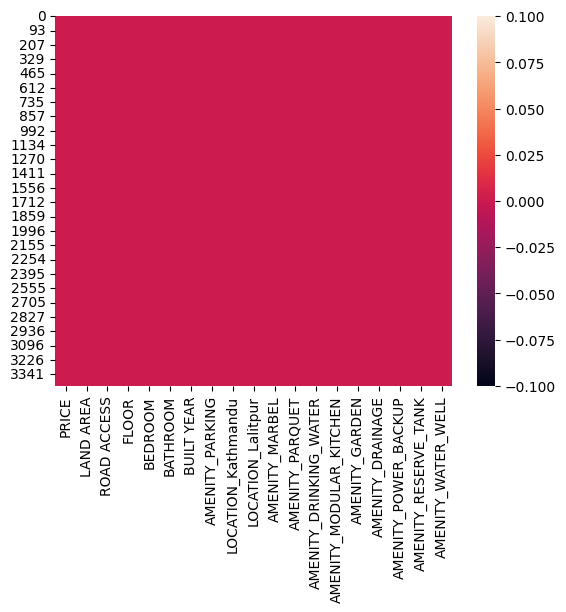

In [39]:
#Check for presence of null values in the newly cleaned data
sns.heatmap(ds.isnull())


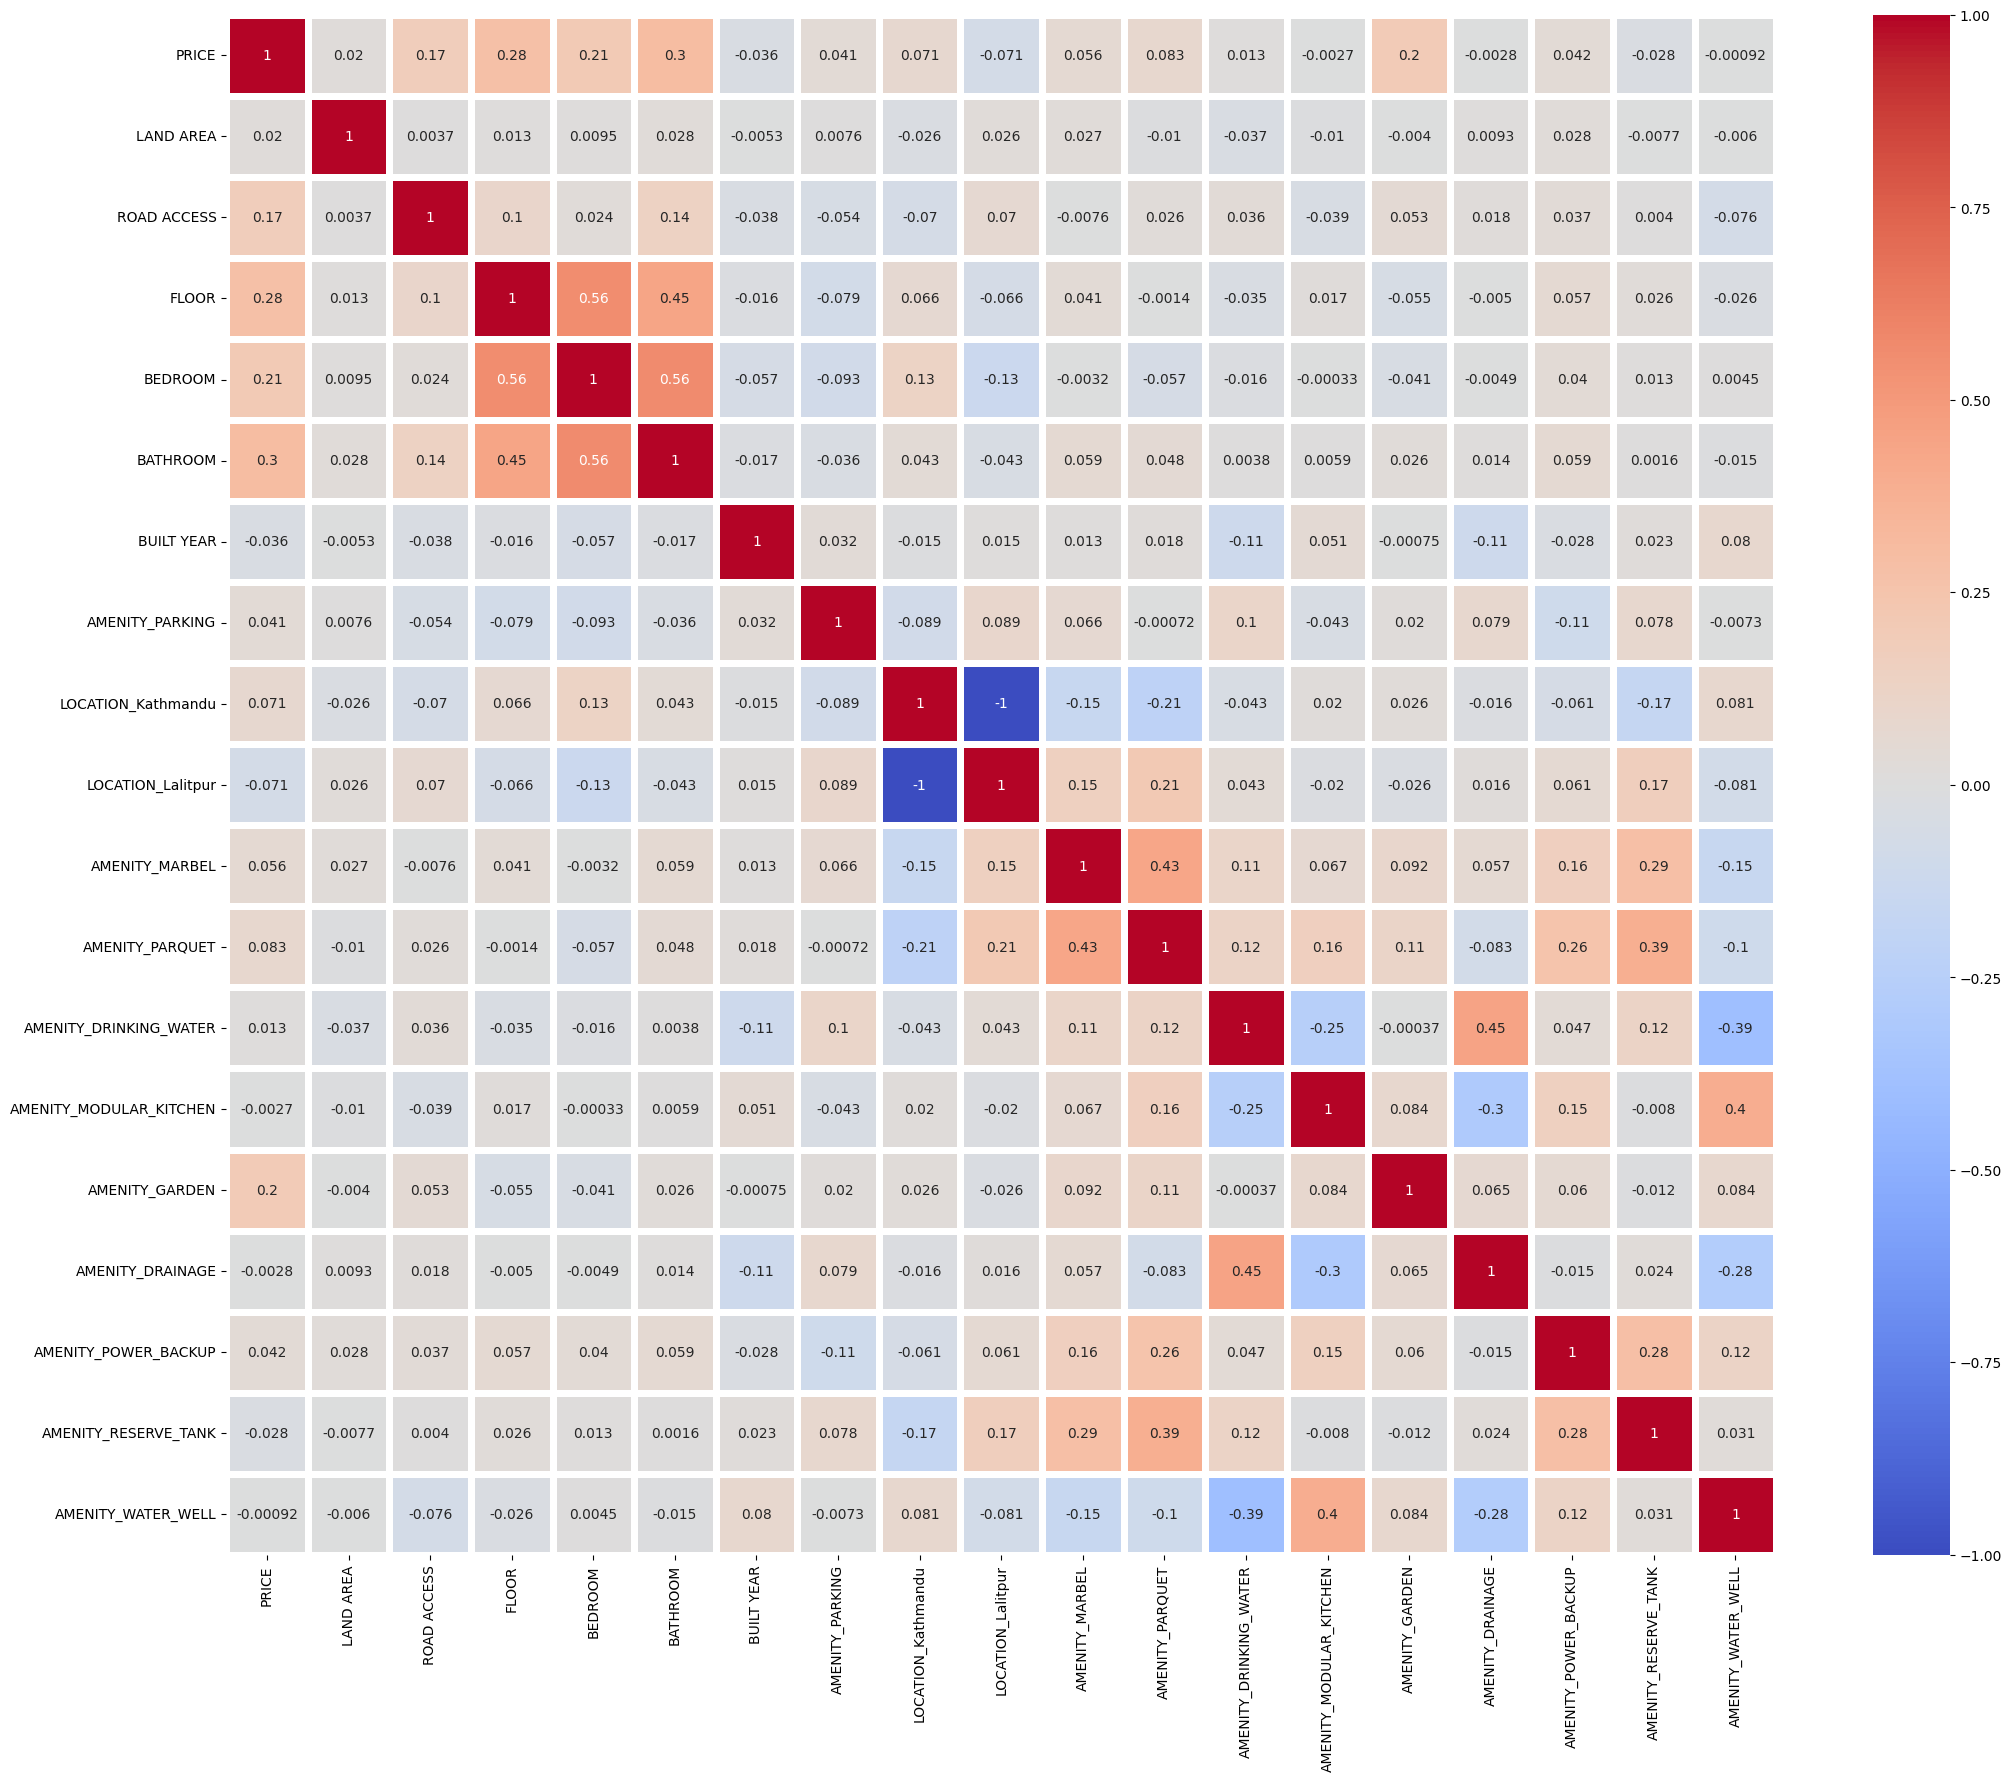

In [40]:
plt.figure(figsize=(25,20))
axis = sns.heatmap(ds.corr(), cmap = "coolwarm", annot=True, linewidth=5)


In [41]:
# plt.figure(figsize=(10,8))
# bar = sns.histplot(ds['PRICE'])
# bar.legend(['Skewness: {:.2f}'.format(ds['PRICE'].skew())])

In [42]:
# skewness_dict = {}
# for col in ds.columns:
#     skewness_dict[col] = ds[col].skew()

# # Create a subplot grid to plot histograms
# num_columns = len(ds.columns)
# num_rows = int(np.ceil(num_columns / 2))  # To have two columns of subplots

# plt.figure(figsize=(15, 5 * num_rows))

# # Loop through each column and create the histogram subplot
# for i, col in enumerate(ds.columns):
#     plt.subplot(num_rows, 2, i + 1)
#     sns.histplot(ds[col])
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.legend(['Skewness: {:.2f}'.format(skewness_dict[col])])

# plt.tight_layout()
# plt.show()

In [43]:
# columns = ds.columns
# # Loop through each column and apply the log transformation
# for col in columns:
#     ds[col] = np.log10(ds[col] + 1) 
# print('done')

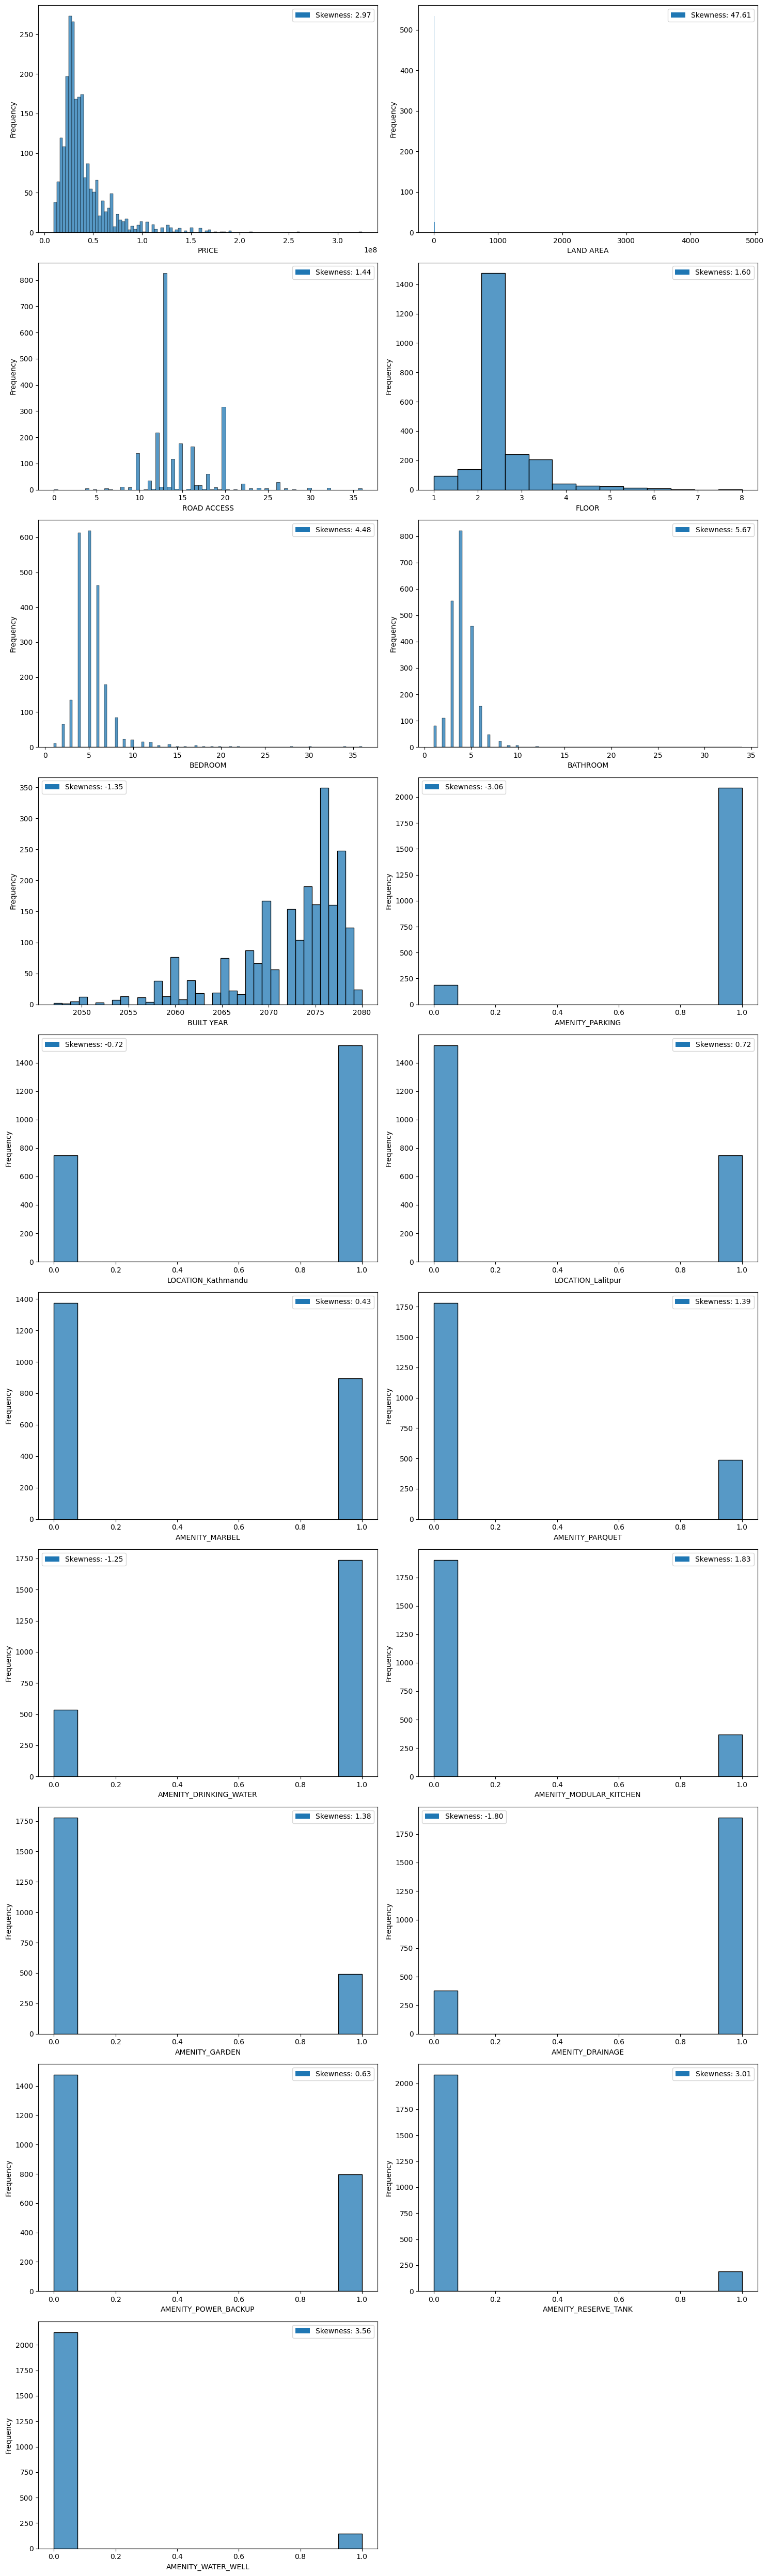

In [44]:
skewness_dict = {}
for col in ds.columns:
    skewness_dict[col] = ds[col].skew()

# Create a subplot grid to plot histograms
num_columns = len(ds.columns)
num_rows = int(np.ceil(num_columns / 2))  # To have two columns of subplots

plt.figure(figsize=(15, 5 * num_rows))

# Loop through each column and create the histogram subplot
for i, col in enumerate(ds.columns):
    plt.subplot(num_rows, 2, i + 1)
    sns.histplot(ds[col])
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend(['Skewness: {:.2f}'.format(skewness_dict[col])])

plt.tight_layout()
plt.show()

In [45]:
# X = ds.drop('PRICE', axis=1)
# y = ds['PRICE']

# # Initialize the linear regression model
# model = LinearRegression()

# # Perform k-fold cross-validation
# k = 5  # You can set the desired number of folds
# scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=k)

# # Calculate the root mean squared error (RMSE) from the negative mean squared error
# rmse_scores = np.sqrt(-scores)

# # Print the mean RMSE and the standard deviation of RMSE scores
# print("Mean RMSE: {:.2f}".format(np.mean(rmse_scores)))
# print("Standard Deviation of RMSE: {:.2f}".format(np.std(rmse_scores)))

In [46]:
X = ds.drop('PRICE', axis=1)
y = ds['PRICE']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestRegressor()

# Evaluate using K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_mean_absolute_error')
mse_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='r2')

# Calculate the mean and standard deviation of the evaluation metrics
mae_mean, mae_std = -mae_scores.mean(), mae_scores.std()
mse_mean, mse_std = -mse_scores.mean(), mse_scores.std()
r2_mean, r2_std = r2_scores.mean(), r2_scores.std()

# Print the evaluation metrics
print("Mean Absolute Error:", mae_mean)
print("Mean Squared Error:", mse_mean)
print("Root Mean Squared Error:", np.sqrt(mse_mean))
print("R-squared:", r2_mean)
print("R-squared (Percentage): {:.2f}%".format(r2_mean*100))

Mean Absolute Error: 9301541.019483704
Mean Squared Error: 290510759175027.3
Root Mean Squared Error: 17044376.174416807
R-squared: 0.5853143075836693
R-squared (Percentage): 58.53%


# Train test split

In [47]:
x = ds.drop('PRICE', axis=1)
y = ds['PRICE']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20)


# Training and Predicting

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)

predictions = model.predict(x_test)
predictions

# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r_squared = metrics.r2_score(y_test, predictions)

# Convert R-squared to percentage
r_squared_percentage = r_squared * 100

# Print the evaluation metrics
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)
print("R-squared (Percentage): {:.2f}%".format(r_squared_percentage))

Mean Absolute Error: 15696955.575528357
Mean Squared Error: 539179485643271.9
Root Mean Squared Error: 23220238.707715128
R-squared: 0.06707816097352093
R-squared (Percentage): 6.71%


In [49]:

# x = ds.drop('PRICE', axis=1)
# y = ds['PRICE']

# model_rf = RandomForestRegressor(random_state=42)
# model_gb = GradientBoostingRegressor(random_state=42)

# # Evaluate using K-Fold Cross-Validation
# kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# # Random Forest Regressor
# rf_mae_scores = -cross_val_score(model_rf, X_scaled, y, cv=kfold, scoring='neg_mean_absolute_error')
# rf_mse_scores = -cross_val_score(model_rf, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
# rf_r2_scores = cross_val_score(model_rf, X_scaled, y, cv=kfold, scoring='r2')

# # Gradient Boosting Regressor
# gb_mae_scores = -cross_val_score(model_gb, X_scaled, y, cv=kfold, scoring='neg_mean_absolute_error')
# gb_mse_scores = -cross_val_score(model_gb, X_scaled, y, cv=kfold, scoring='neg_mean_squared_error')
# gb_r2_scores = cross_val_score(model_gb, X_scaled, y, cv=kfold, scoring='r2')

# # Calculate the mean and standard deviation of the evaluation metrics for each model
# rf_mae_mean, rf_mae_std = rf_mae_scores.mean(), rf_mae_scores.std()
# rf_mse_mean, rf_mse_std = rf_mse_scores.mean(), rf_mse_scores.std()
# rf_r2_mean, rf_r2_std = rf_r2_scores.mean(), rf_r2_scores.std()

# gb_mae_mean, gb_mae_std = gb_mae_scores.mean(), gb_mae_scores.std()
# gb_mse_mean, gb_mse_std = gb_mse_scores.mean(), gb_mse_scores.std()
# gb_r2_mean, gb_r2_std = gb_r2_scores.mean(), gb_r2_scores.std()

# # Print the results for both models
# print("Random Forest Regressor:")
# print("Mean Absolute Error (MAE): {:.2f} (+/- {:.2f})".format(rf_mae_mean, rf_mae_std))
# print("Mean Squared Error (MSE): {:.2f} (+/- {:.2f})".format(rf_mse_mean, rf_mse_std))
# print("R-squared (R2): {:.2f} (+/- {:.2f})".format(rf_r2_mean, rf_r2_std))

# print("\nGradient Boosting Regressor:")
# print("Mean Absolute Error (MAE): {:.2f} (+/- {:.2f})".format(gb_mae_mean, gb_mae_std))
# print("Mean Squared Error (MSE): {:.2f} (+/- {:.2f})".format(gb_mse_mean, gb_mse_std))
# print("R-squared (R2): {:.2f} (+/- {:.2f})".format(gb_r2_mean, gb_r2_std))

# print("Random Forest Regressor:")
# print("R-squared (R2): {:.2f} (+/- {:.2f})".format(rf_r2_mean, rf_r2_std))

# print("\nGradient Boosting Regressor:")
# print("R-squared (R2): {:.2f} (+/- {:.2f})".format(gb_r2_mean, gb_r2_std))

# rf_accuracy = rf_r2_mean * 100
# gb_accuracy = gb_r2_mean * 100

# print("Random Forest Regressor Accuracy: {:.2f}%".format(rf_accuracy))
# print("Gradient Boosting Regressor Accuracy: {:.2f}%".format(gb_accuracy))



In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import HuberRegressor, PassiveAggressiveRegressor
from sklearn.linear_model import OrthogonalMatchingPursuit

X = ds.drop('PRICE', axis=1)
y = ds['PRICE']

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Create a KFold object with desired number of folds
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize all the regression models
models = {
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'ExtraTrees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(silent=True),  # Set silent=True to avoid output
    'Huber': HuberRegressor(),
    'PassiveAggressive': PassiveAggressiveRegressor(),
    'OrthogonalMatchingPursuit': OrthogonalMatchingPursuit(),
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Bayesian Ridge Regression': BayesianRidge(),
    'ElasticNet Regression': ElasticNet()
}

# Evaluate each model using k-fold cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kfold, scoring='r2')
    mean_score, std_score = scores.mean(), scores.std()
    print(f'{model_name} R2 Accuracy: {mean_score * 100:.4f} (Std: {std_score:.4f})')


NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor

X = ds.drop('PRICE', axis=1)
y = ds['PRICE']


# Assuming your dataset is stored in X and y (features and target)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (not required for tree-based models, but we'll do it for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
y_pred_rf = rf_regressor.predict(X_test_scaled)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_scaled, y_train)
y_pred_gb = gb_regressor.predict(X_test_scaled)

# CatBoost Regressor
catboost_regressor = CatBoostRegressor(random_state=42, verbose=0)
catboost_regressor.fit(X_train, y_train)
y_pred_catboost = catboost_regressor.predict(X_test)

# Evaluate the models
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)

# Convert MSE to RMSE
rmse_rf = np.sqrt(mse_rf)
rmse_gb = np.sqrt(mse_gb)
rmse_catboost = np.sqrt(mse_catboost)

# Calculate R-squared
r2_rf = r2_score(y_test, y_pred_rf)
r2_gb = r2_score(y_test, y_pred_gb)
r2_catboost = r2_score(y_test, y_pred_catboost)

print("Random Forest Regressor:")
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

print("\nGradient Boosting Regressor:")
print("Root Mean Squared Error:", rmse_gb)
print("R-squared:", r2_gb)

print("\nCatBoost Regressor:")
print("Root Mean Squared Error:", rmse_catboost)
print("R-squared:", r2_catboost)


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor

# Store dataset in X and y (features and target)
X = ds.drop('PRICE', axis=1)
y = ds['PRICE']

# Initialize KFold with the number of desired folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Standardize the features (not required for tree-based models, but we'll do it for consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)
rf_rmse_scores = np.sqrt(-cross_val_score(rf_regressor, X_scaled, y, scoring="neg_mean_squared_error", cv=kf))
rf_r2_scores = cross_val_score(rf_regressor, X_scaled, y, scoring="r2", cv=kf)

# Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_rmse_scores = np.sqrt(-cross_val_score(gb_regressor, X_scaled, y, scoring="neg_mean_squared_error", cv=kf))
gb_r2_scores = cross_val_score(gb_regressor, X_scaled, y, scoring="r2", cv=kf)

# CatBoost Regressor
catboost_regressor = CatBoostRegressor(random_state=42, verbose=0)
catboost_rmse_scores = np.sqrt(-cross_val_score(catboost_regressor, X, y, scoring="neg_mean_squared_error", cv=kf))
catboost_r2_scores = cross_val_score(catboost_regressor, X, y, scoring="r2", cv=kf)

def display_scores(scores, r2_scores, model_name):
    print(f"{model_name}:")
    print("Root Mean Squared Error scores:", scores)
    print("Root Mean Squared Error mean:", scores.mean())
    print("Root Mean Squared Error std:", scores.std())

#     r2_scores = cross_val_score(catboost_regressor, X, y, scoring="r2", cv=kf)
    print("R-squared scores:", r2_scores)
    print("R-squared mean:", r2_scores.mean())
    print("R-squared std:", r2_scores.std())
    print("\n")

display_scores(rf_rmse_scores, rf_r2_scores, "Random Forest Regressor")
display_scores(gb_rmse_scores, gb_r2_scores, "Gradient Boosting Regressor")
display_scores(catboost_rmse_scores, catboost_r2_scores, "CatBoost Regressor")


# Display how influence each column on PRICE

In [ ]:
plt.figure(figsize=(9,16))
corr_fetch_series = pd.Series.sort_values(X.corrwith(y))
sns.barplot(x=corr_fetch_series, y=corr_fetch_series.index, orient = 'h')

# Check if any column is a object type

In [ ]:
# common_amenities = ['DRAINAGE', 'GARDEN', 'EARTHQUACK RESISTANT', 'DRINKING WATER', 'POWER BACKUP', 'RESERVE TANK', 'MODULAR KITCHEN', 'WATER WELL', 'MARBEL', 'PARQUET']
# ds = ds.drop(['AMENITY_DRAINAGE','AMENITY_DRINKING_WATER', 'AMENITY_MODULAR_KITCHEN', 'AMENITY_WATER_WELL'], axis=1)

In [ ]:
not_object_type = list(ds.loc[:,ds.dtypes != 'object'].columns.values)
not_object_type

In [ ]:
is_object_type = list(ds.loc[:, ds.dtypes == 'object'].columns.values)
print(len(obj_feat))

In [ ]:
ds.shape

# Display the correlationship among the attributes

In [ ]:
plt.figure(figsize=(25,20))
axis = sns.heatmap(ds.corr(), cmap = "coolwarm", annot=True, linewidth=5)
bottom, top = axis.get_ylim()
axis.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
high_corr = ds.corr()
high_corr_features = high_corr.index[abs(high_corr["PRICE"]) >= 0.2]
high_corr_features

In [ ]:
X = ds.drop('PRICE', axis=1)
y = ds['PRICE']

def test_model(model, X_train=X, y_train=y):
    cv = KFold(n_splits = 5, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [ ]:
# LR = linear_model.LinearRegression()
# test_model(LR)

In [ ]:
# rdg = linear_model.Ridge()
# test_model(rdg)

In [ ]:
# lasso = linear_model.Lasso(alpha=1e-4)
# test_model(lasso)

In [ ]:
# svr = SVR(kernel='rbf')
# test_model(svr)

In [ ]:
# xgb_reg=xgboost.XGBRegressor()
# test_model(xgb_reg)

In [ ]:
# xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
# test_model(xgb_reg)

In [ ]:
xgb_reg=xgboost.XGBRegressor(n_estimators= 100,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')

test_model(xgb2_reg)

In [ ]:
# br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
# test_model(br_reg)

In [ ]:
X = ds.drop('PRICE', axis=1)
y = ds['PRICE']

catboost_regressor = CatBoostRegressor(random_state=42, verbose=0)
test_model(catboost_regressor)



In [ ]:
catboost_regressor.fit(X, y)
xgb_reg.fit(X, y)
rf_regressor.fit(X, y)
gb_regressor.fit(X, y)

In [ ]:
new_data = { 
    'LAND AREA': [2.5], 
    'ROAD ACCESS': [15], 
    'FLOOR': [3],  
    'BEDROOM': [5],  
    'BATHROOM': [5], 
    'BUILT YEAR': [2070],  
    'AMENITY_PARKING': [1],  
    'LOCATION_Kathmandu': [1],
    'LOCATION_Lalitpur': [0], 
    'AMENITY_MARBEL': [0], 
    'AMENITY_PARQUET': [1],  
    'AMENITY_DRINKING_WATER': [1], 
    'AMENITY_MODULAR_KITCHEN': [0],
    'AMENITY_GARDEN': [1],  
    'AMENITY_DRAINAGE': [1], 
    'AMENITY_POWER_BACKUP': [0],  
    'AMENITY_RESERVE_TANK': [1],  
    'AMENITY_WATER_WELL': [0]  
}
new_data_df = pd.DataFrame(new_data)
predictions = catboost_regressor.predict(new_data_df)
predictions

In [ ]:
predictions = xgb_reg.predict(new_data_df)
predictions

In [ ]:
predictions = rf_regressor.predict(new_data_df)
predictions

In [ ]:
predictions = gb_regressor.predict(new_data_df)
predictions

In [ ]:
#Create a picke file

In [ ]:

    #----------TRAIN TEST SPLIT----------
    x = ds.drop('PRICE', axis=1)
    y = ds['PRICE']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20)

    #----------TRAINING AND PREDICTING----------
    model = CatBoostRegressor(random_state=42, verbose=0)
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    #----------EVALUATING METRICS----------
    # Calculate evaluation metrics
    mae = metrics.mean_absolute_error(y_test, predictions)
    mse = metrics.mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r_squared = metrics.r2_score(y_test, predictions)

    # Convert R-squared to percentage
    r_squared_percentage = r_squared * 100

    # Print the evaluation metrics
    print("Mean Absolute Error:", mae)
    print("Mean Squared Error:", mse)
    print("Root Mean Squared Error:", rmse)
    print("R-squared:", r_squared)
    print("R-squared (Percentage): {:.2f}%".format(r_squared_percentage))